In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Load data

In [2]:
df = pd.read_csv('Mall_Data.csv', index_col=0)
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

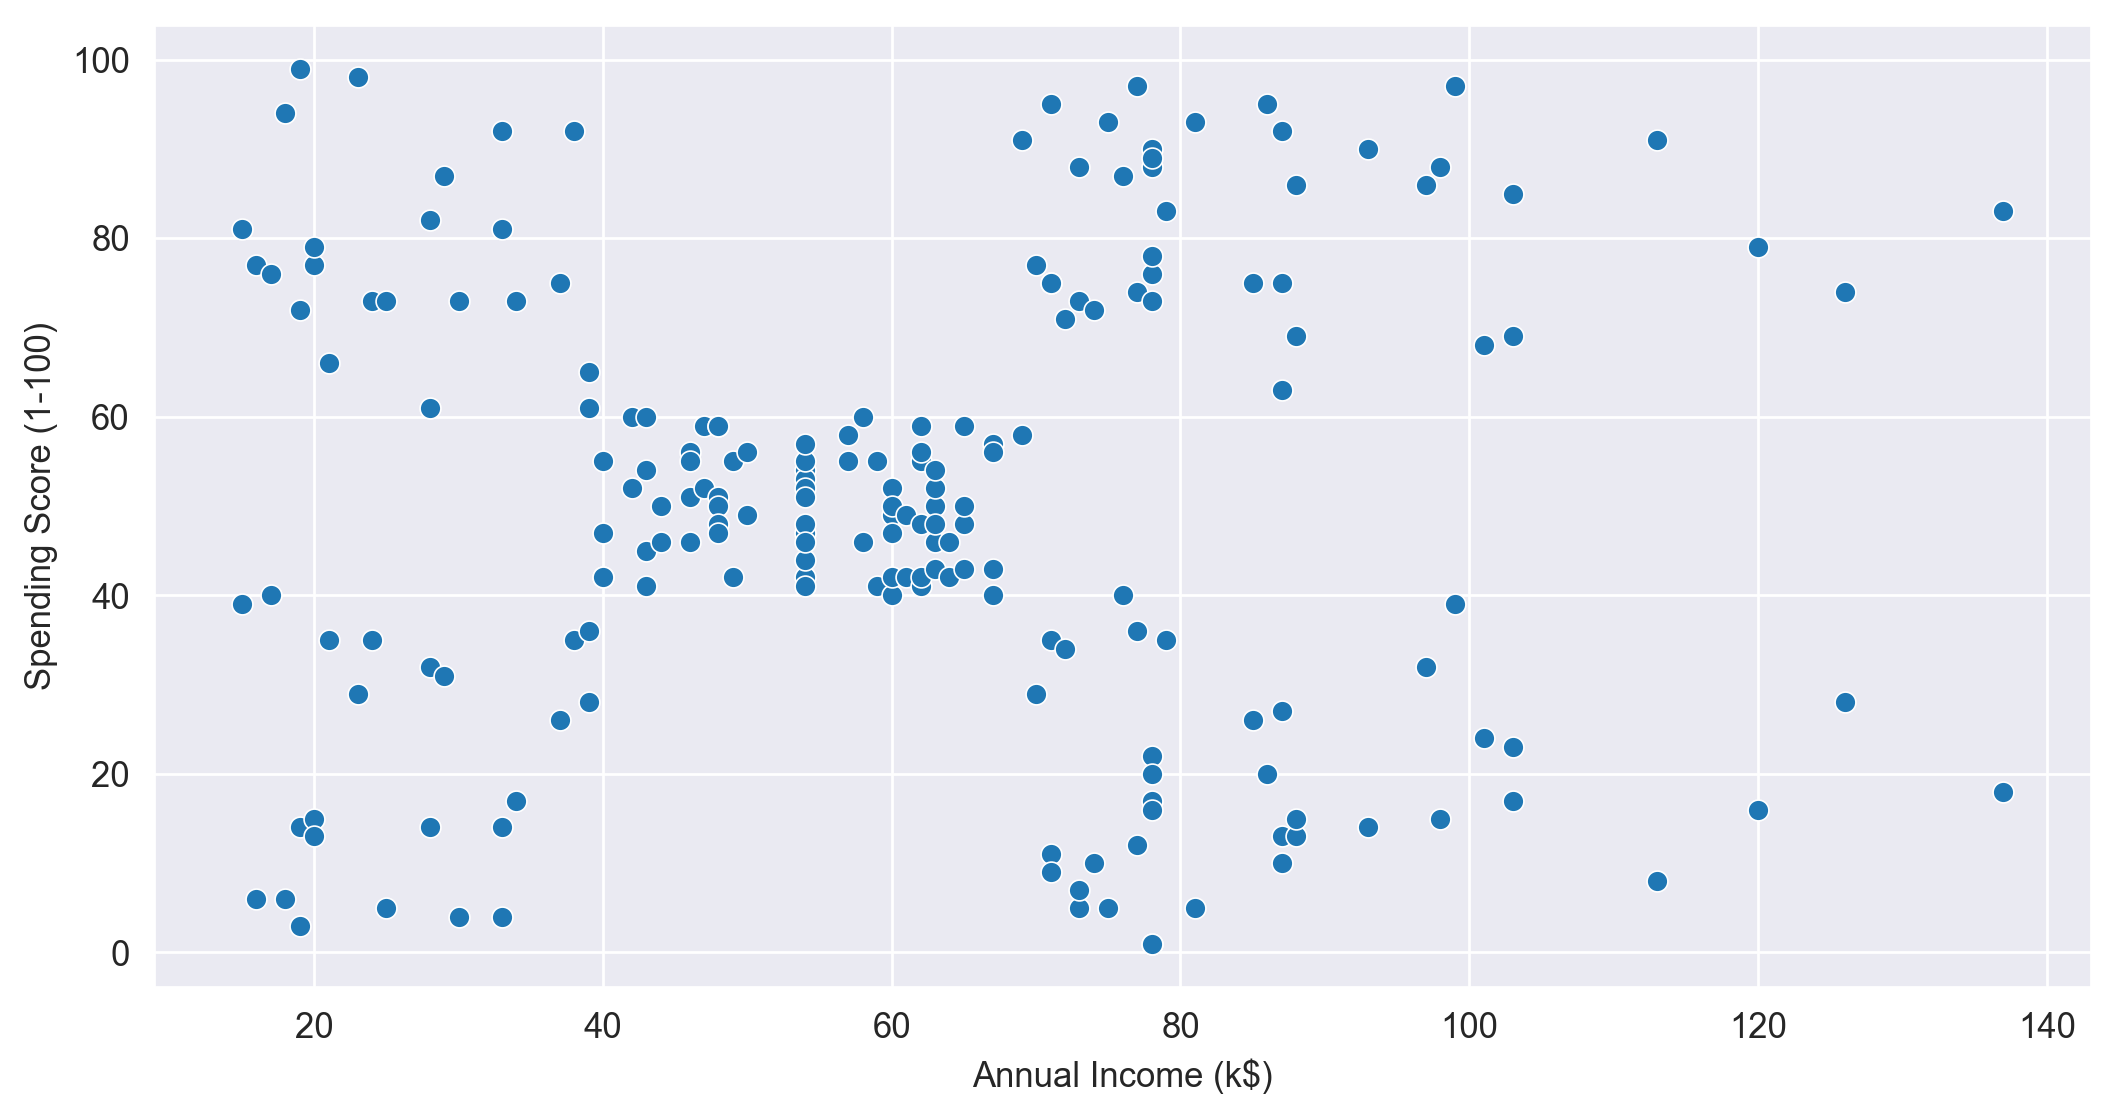

In [3]:
#Data visualization
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [4]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [ ]:
#Model Building

In [6]:
from sklearn.cluster import KMeans

In [8]:
df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [7]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7,
       3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 1, 7, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 0, 6, 4, 6, 0, 6, 0, 6,
       4, 6, 0, 6, 0, 6, 0, 6, 0, 6, 4, 6, 0, 6, 4, 6, 0, 6, 0, 6, 0, 6,
       0, 6, 0, 6, 0, 6, 4, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6,
       0, 6, 0, 6, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2])

In [9]:
#cluster centre
km.cluster_centers_

array([[ 0.73205646, -1.42897101],
       [-0.54143335,  0.03396887],
       [ 1.87564575,  1.23452563],
       [-1.35185213, -1.19089759],
       [ 0.09147387, -0.11325768],
       [ 1.87564575, -1.09476801],
       [ 0.68673384,  1.241219  ],
       [-1.35366972,  1.15873115]])

In [ ]:
#Visualize the clusters
x[:,0]

In [ ]:
x[:,1]

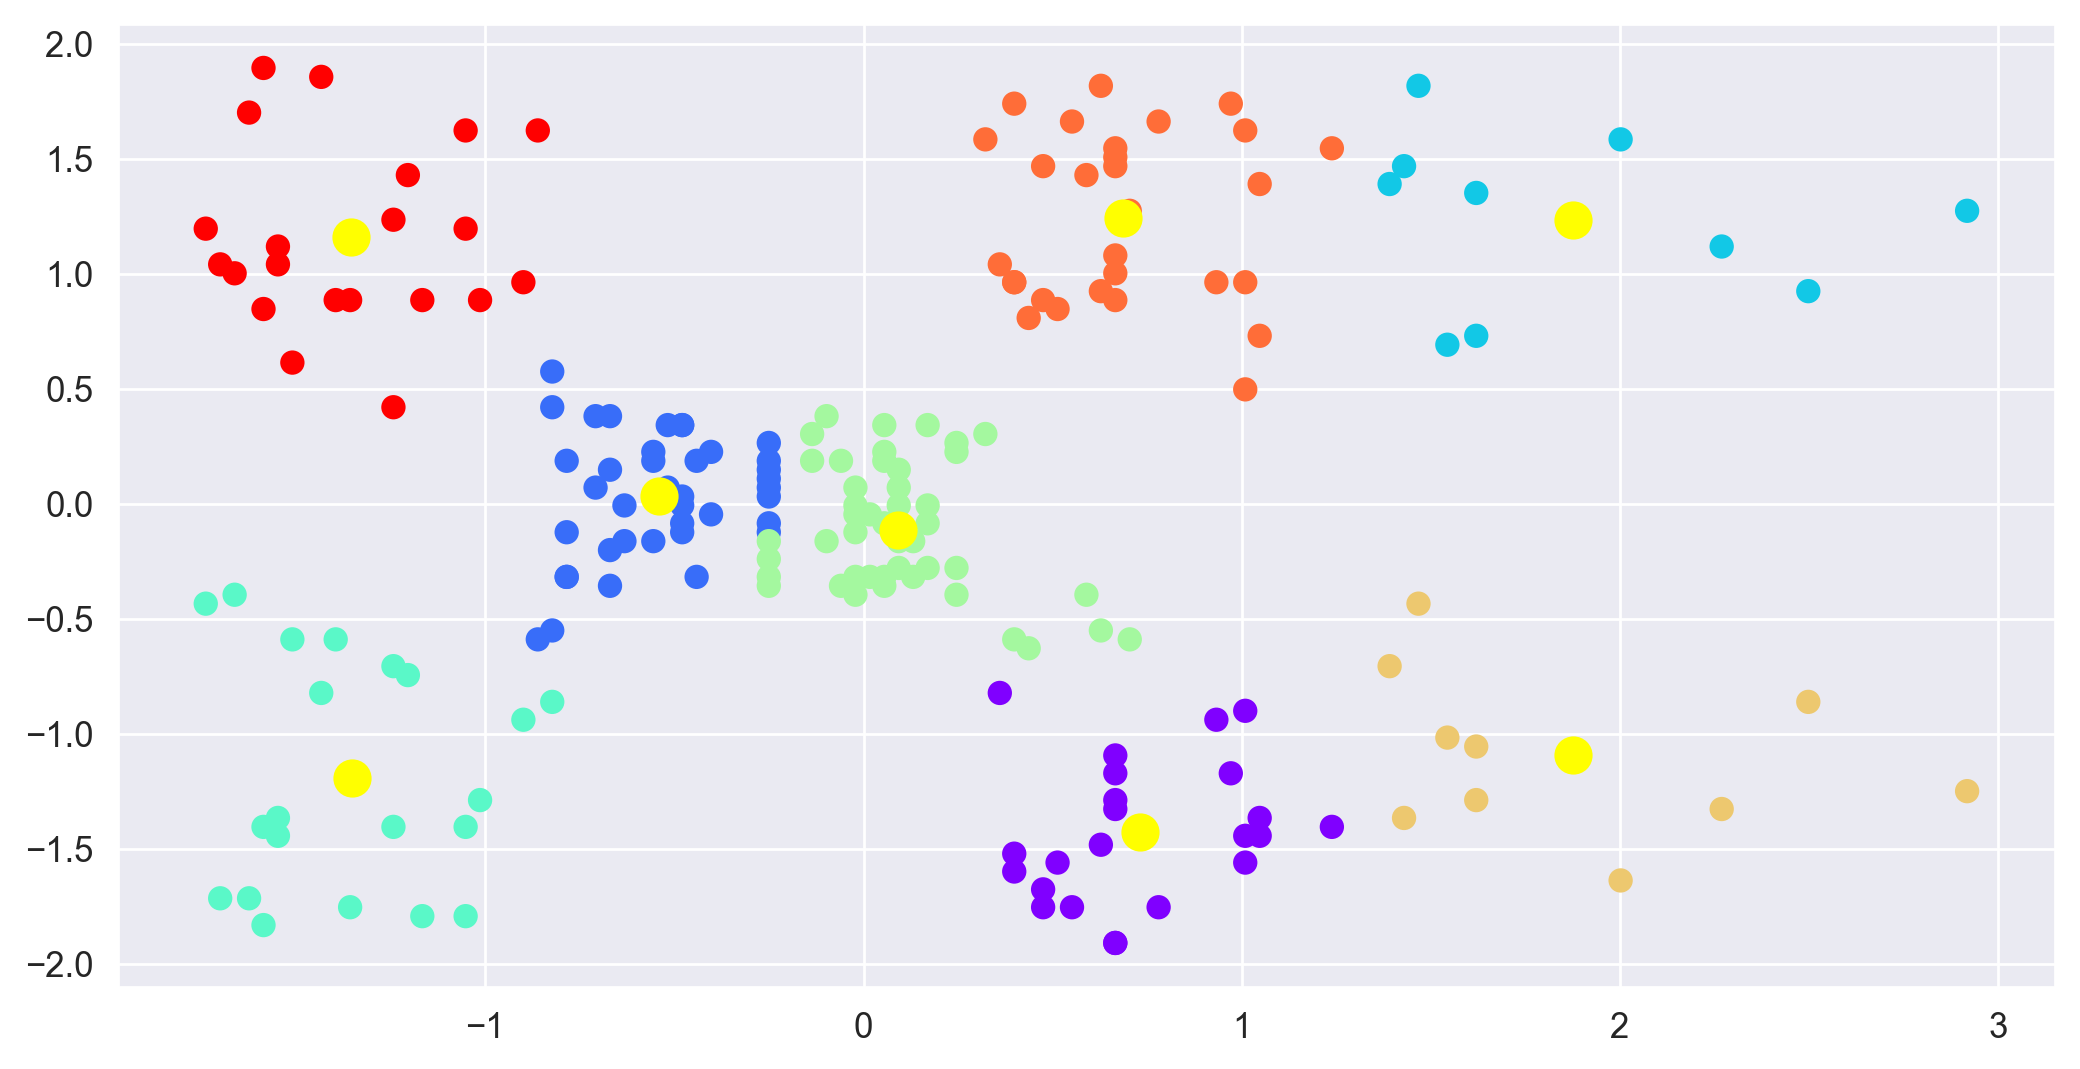

In [13]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [14]:
km.inertia_

37.183497459697236

# Elbow graph 

In [15]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [16]:
wcss

[400.0,
 270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.91118554999014,
 37.228433137937515,
 32.33704843502526,
 29.26820529358408]

Text(0.5, 1.0, 'Elbow Graph')

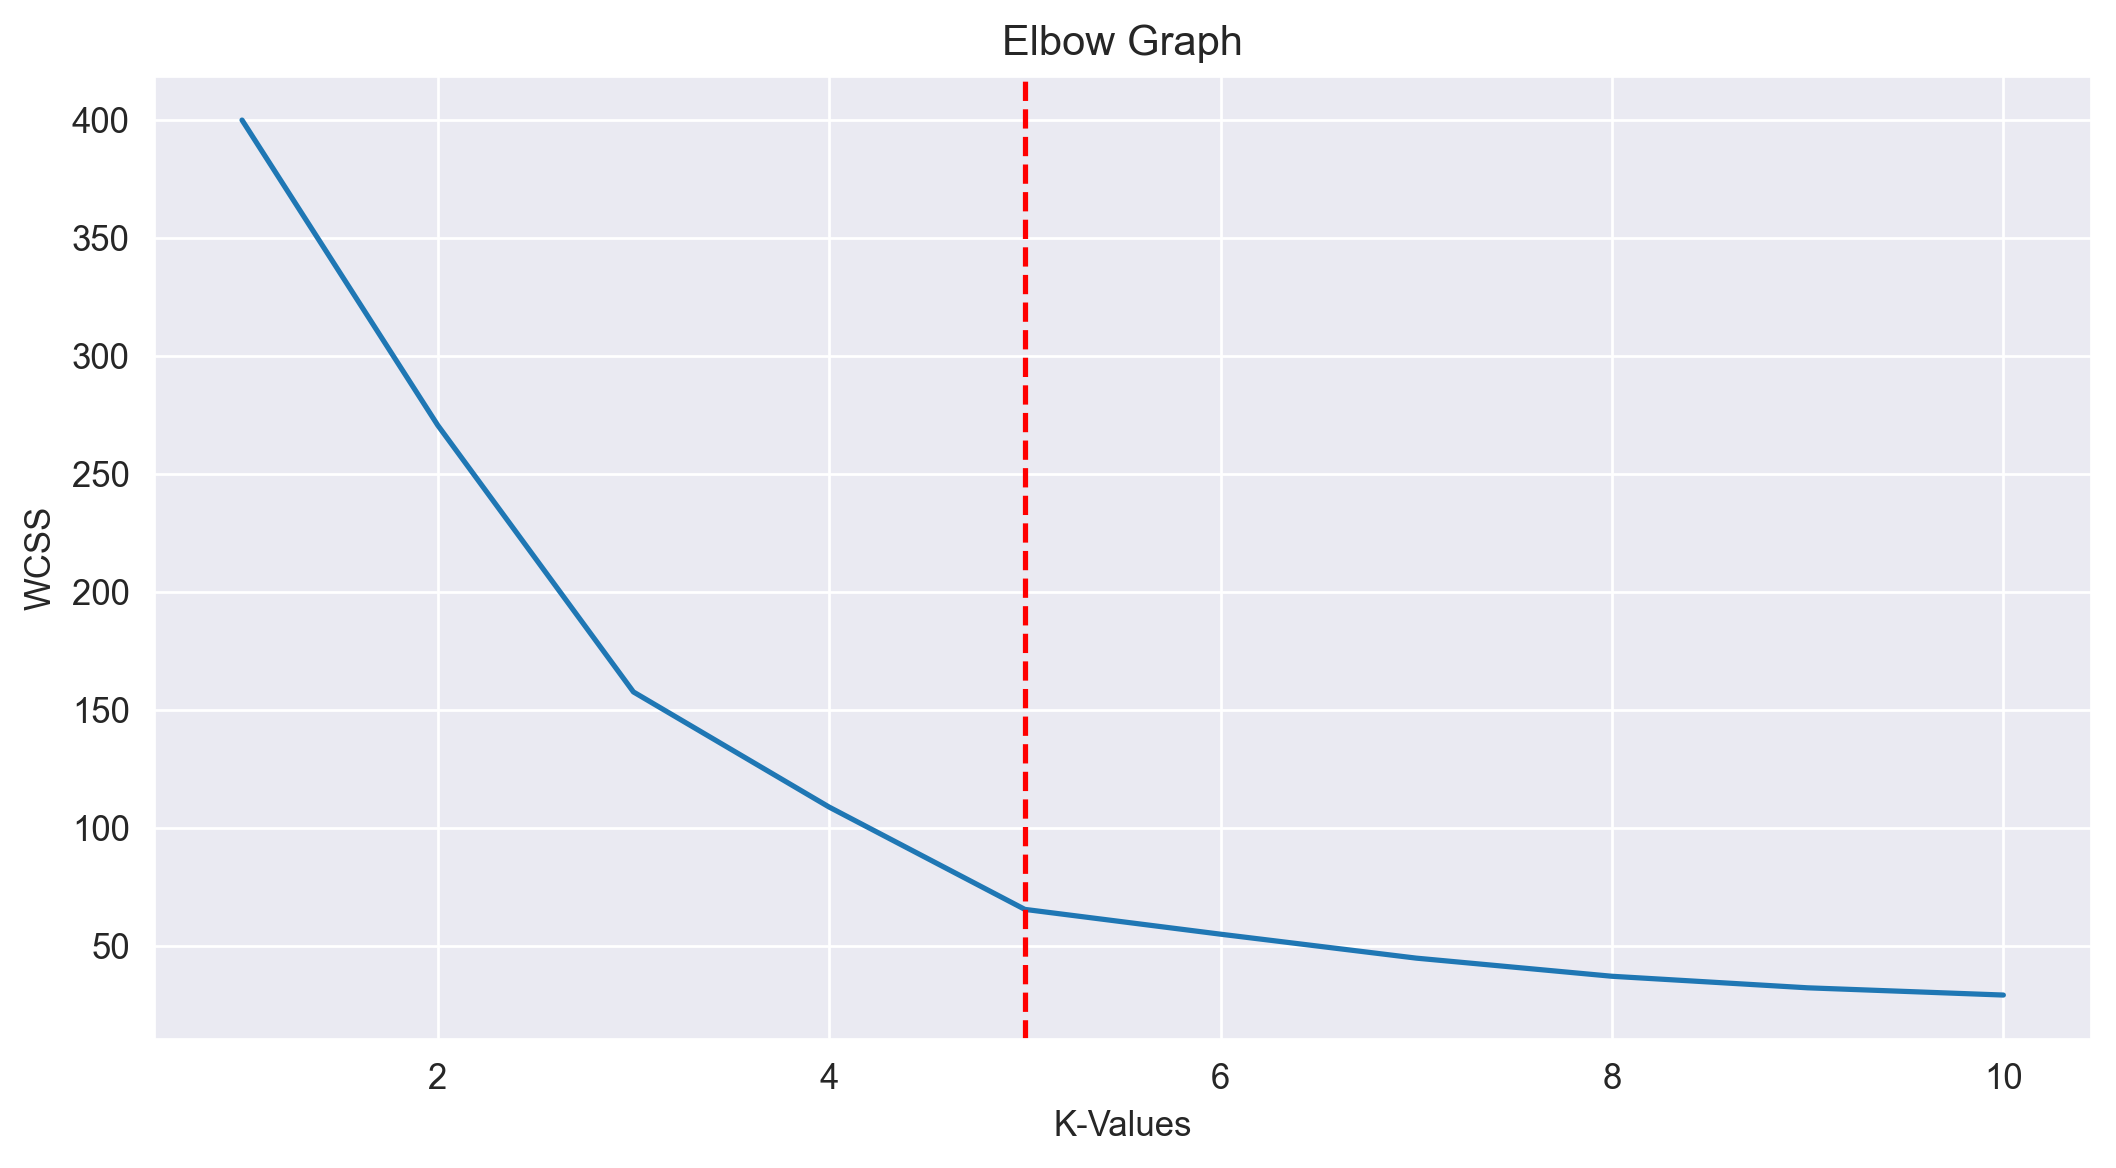

In [18]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Final Model

In [19]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [ ]:
#Visualize the clusters

In [20]:
km.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907]])

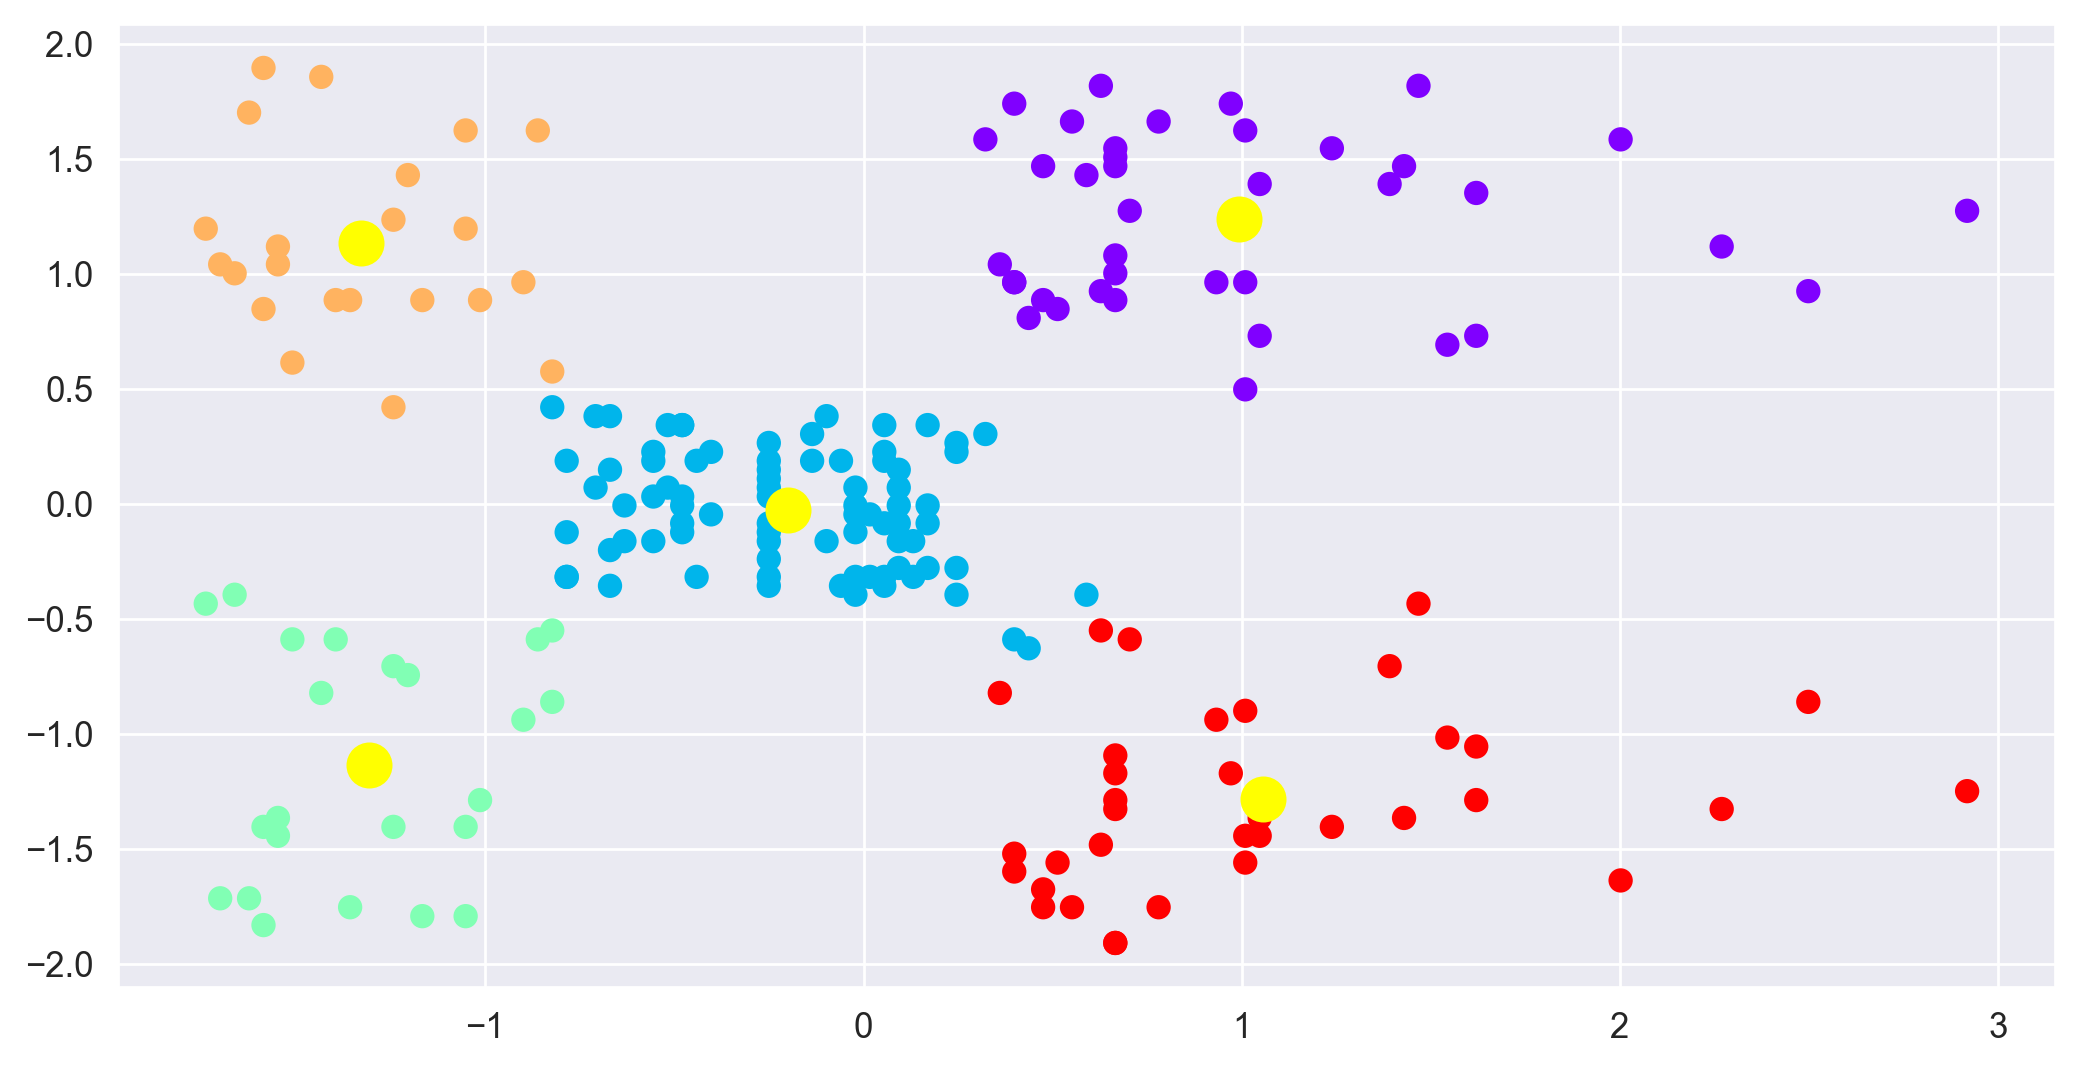

In [21]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

# Evaluation of Kmeans

<code> **STEP 1:** </code>
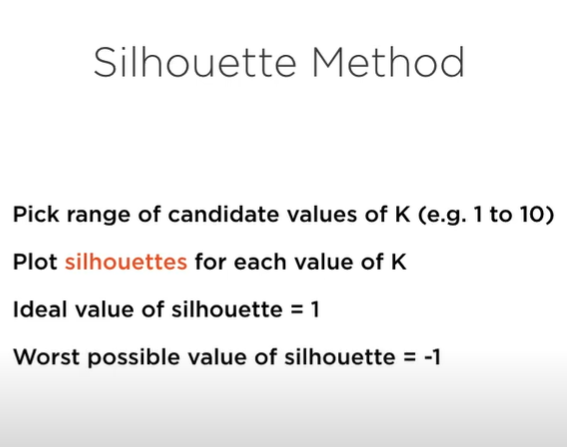


<code>**STEP 2**</code>
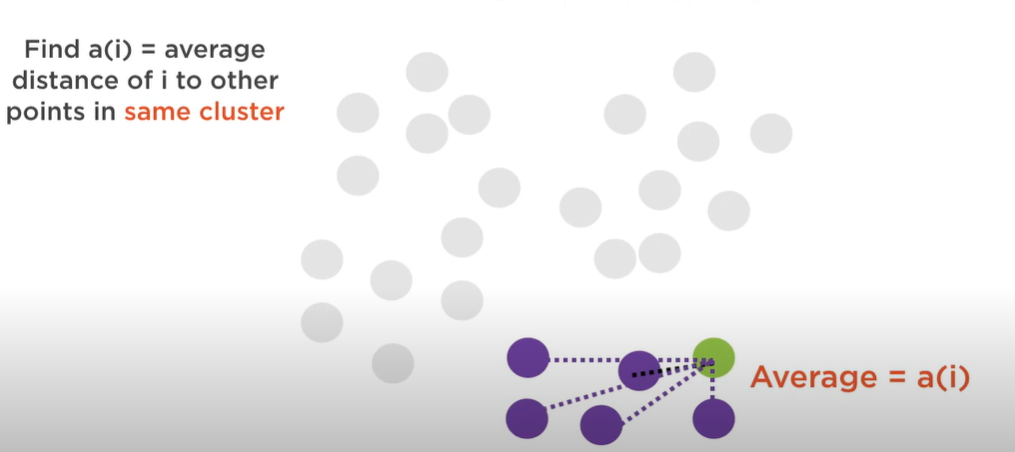

<code>**STEP 3**</code>
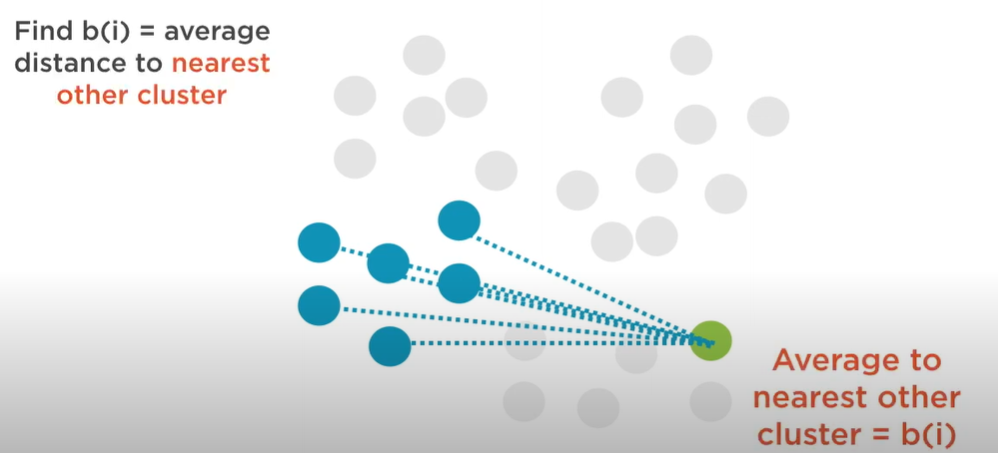

<code>**STEP 4:** </CODE>
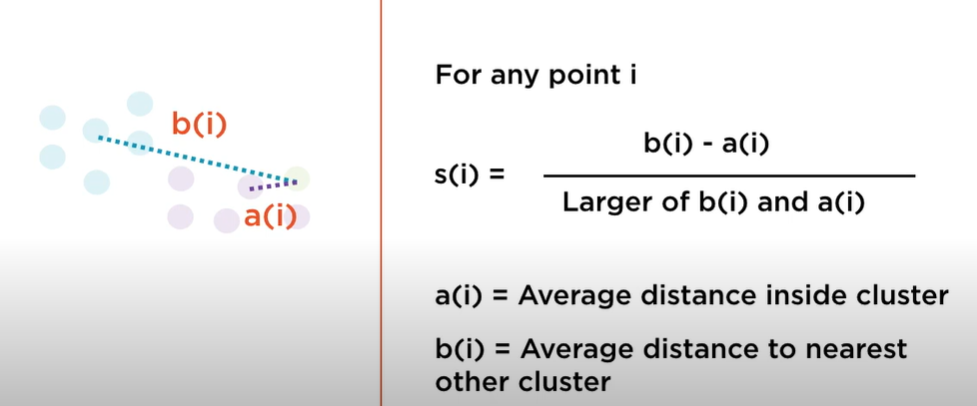

In [ ]:
#Silhouette score

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(x,ypred)

0.5546571631111091

In [24]:
#Analyzing clusters
df['cluster'] = ypred
df

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,2
2,15,81,3
3,16,6,2
4,16,77,3
5,17,40,2
...,...,...,...
196,120,79,0
197,126,28,4
198,126,74,0


In [25]:
df.groupby('cluster').agg('mean')

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,86.538462,82.128205
1,55.296296,49.518519
2,26.304348,20.913043
3,25.727273,79.363636
4,88.200000,17.114286


In [26]:
df['cluster'].value_counts()

1    81
0    39
4    35
2    23
3    22
Name: cluster, dtype: int64